In [1]:
!pip install transformers
!pip install datasets
!pip install bertviz
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 whi

In [2]:
from datasets import load_dataset

In [3]:
emotion=load_dataset("emotion")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [4]:
emotion.set_format(type="pandas")

In [5]:
train=emotion["train"][:]
test=emotion["test"][:]
val=emotion["validation"][:]

In [6]:
classes=emotion["train"].features["label"].names

In [7]:
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [8]:
train["label_name"]=[classes[i] for i in train["label"]]

In [9]:
train

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [10]:
import matplotlib.pyplot as plt
train["label_name"].value_counts()

,count
label_name,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


<Axes: xlabel='label_name', ylabel='count'>

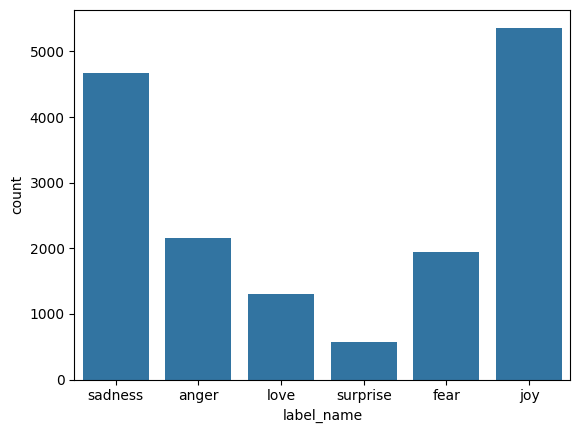

In [11]:
import seaborn as sns
sns.countplot(data=train,x="label_name")

In [12]:
from transformers import AutoTokenizer
checkpoint="distilbert-base-uncased"
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [13]:
text=train["text"][0]

In [14]:
text

'i didnt feel humiliated'

In [15]:
encoded_text=tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2134, 2102, 2514, 26608, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}


In [16]:
tokens=tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [17]:
tokenizer.vocab_size

30522

In [18]:
tokenizer.model_max_length

512

TOKENIZATION OF EMOTION DATA

In [19]:
emotion.reset_format()

In [20]:
def tokenize(batch):
  temp=tokenizer(batch["text"],padding=True,truncation=True)
  return temp

In [21]:
print(tokenize(emotion["train"][:1]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1]]}


In [22]:
emotions_encoded=emotion.map(tokenize,batched=True,batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [23]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

# MODEL_BUILDING

In [24]:
from transformers import AutoModel
import torch
model=AutoModel.from_pretrained(checkpoint)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [25]:
text

'i didnt feel humiliated'

In [26]:
inputs=tokenizer(text,return_tensors="pt")
inputs

{'input_ids': tensor([[  101,  1045,  2134,  2102,  2514, 26608,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [27]:
with torch.no_grad():
  outputs=model(**inputs)

last_hiddedn_state=outputs.last_hidden_state

In [28]:
from transformers import AutoModelForSequenceClassification
device="cuda" if torch.cuda.is_available() else "cpu"
model=AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=6).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
from transformers import TrainingArguments
BATCH_SIZE=64
model_name="distilbert-finetuned-emotion"
training_arg=TrainingArguments(output_dir=model_name,
                               num_train_epochs=2,
                               per_device_train_batch_size=BATCH_SIZE,
                               per_device_eval_batch_size=BATCH_SIZE,
                               weight_decay=0.01,
                               evaluation_strategy="epoch",
                               save_strategy="epoch",
                               load_best_model_at_end=True,
                               )

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [30]:
!pip install -U accelerate

In [31]:
from sklearn.metrics import accuracy_score, f1_score

In [36]:
def compute_metrics(pred):
  labels=pred.label_ids
  preds=pred.predictions.argmax(-1)
  f1=f1_score(labels,preds,average="weighted")
  acc=accuracy_score(labels,preds)
  return {"accuracy":acc,"f1":f1}

from transformers import Trainer

trainer=Trainer(model=model,args=training_arg,
                compute_metrics=compute_metrics,
                train_dataset=emotions_encoded["train"],
                eval_dataset=emotions_encoded["validation"],
                tokenizer=tokenizer)

<ipython-input-36-aa64214ee1b3>:10: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer=Trainer(model=model,args=training_arg,


In [37]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.136835,0.937000,0.937278
2,0.120300,0.127608,0.940500,0.940771


TrainOutput(global_step=500, training_loss=0.12033866882324219, metrics={'train_runtime': 258.6109, 'train_samples_per_second': 123.738, 'train_steps_per_second': 1.933, 'total_flos': 720342861696000.0, 'train_loss': 0.12033866882324219, 'epoch': 2.0})

In [38]:
pred_out=trainer.predict(emotions_encoded["test"])
pred_out.metrics

{'test_loss': 0.1565522402524948,
 'test_accuracy': 0.9265,
 'test_f1': 0.9265671135478927,
 'test_runtime': 3.4032,
 'test_samples_per_second': 587.678,
 'test_steps_per_second': 9.403}

In [39]:
import numpy as np
y_pred=np.argmax(pred_out.predictions,axis=-1)
y_true=emotions_encoded["test"]["label"]

In [41]:
from sklearn.metrics import classification_report
print(classes)
print(classification_report(y_true,y_pred))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       581
           1       0.95      0.94      0.95       695
           2       0.82      0.84      0.83       159
           3       0.90      0.90      0.90       275
           4       0.89      0.92      0.91       224
           5       0.84      0.77      0.80        66

    accuracy                           0.93      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.93      0.93      0.93      2000



In [64]:
text="I LOVE Machine Learning! Tokenization is great"
encode=tokenizer(text,return_tensors="pt").to(device)
model=model.to(device)
with torch.no_grad():
  outputs=model(**encode)


In [65]:
logits=outputs.logits
pred=torch.argmax(logits,dim=1)[0]
pred,classes[pred]

(tensor(1, device='cuda:0'), 'joy')